# Football Probabilities in Python

## Overview
In May 2009,
[Professor David Spiegelhalter](https://en.wikipedia.org/wiki/David_Spiegelhalter)
the Professor for the Understanding of Risk at Cambridge University wrote
[an article](http://news.bbc.co.uk/1/hi/programmes/more_or_less/8062277.stm)
for the BBC concerning the probable outcomes for that last matches of that Premiership football games. This article added to another that he had published called
[One game to play!](https://understandinguncertainty.org/node/228)
which gives a bit more detail on how some of the figures were calculated.

In this Jupyter notebook, we are going to look at implementing some of the mathematical equations for that article in Python using the
[Numpy](https://numpy.org/) and
[SciPy](https://www.scipy.org/)
packages.

## Methods
The article describes the attack strength/defence weakness method (which is also described in
[How to calculate Poisson distribution for football betting](https://help.smarkets.com/hc/en-gb/articles/115001457989-How-to-calculate-Poisson-distribution-for-football-betting))
and concentrates on the game between Arsenal and Stoke City which was played at the Emirates Stadium on Sunday 24th May at 1600 BST.

Looking at how the 
[league table](https://en.wikipedia.org/wiki/2008%E2%80%9309_Premier_League#League_table)
looked at the end of the season and subtracting the goals that we now know Arsenal and Stoke scored, we can setup some variables and check them against the initial values in the article.



In [1]:
# Enable PEP8 code checking.
%load_ext pycodestyle_magic

%pycodestyle_on

In [1]:
import footy

f = footy.Footy()

f.add_team('Arsenal', 64, 36, 18, 19)
f.add_team('Aston Villa', 53, 48, 18, 19)
f.add_team('Blackburn', 40, 60, 18, 19)
f.add_team('Bolton', 41, 52, 19, 18)
f.add_team('Chelsea', 65, 22, 19, 18)
f.add_team('Everton', 53, 37, 19, 18)
f.add_team('Fulham', 39, 32, 18, 19)
f.add_team('Hull', 39, 63, 18, 19)
f.add_team('Liverpool', 74, 26, 18, 19)
f.add_team('Man City', 57, 50, 18, 19)
f.add_team('Man United', 67, 24, 19, 18)
f.add_team('Middlesbrough', 27, 55, 19, 18)
f.add_team('Newcastle', 40, 58, 19, 18)
f.add_team('Portsmouth', 38, 56, 19, 18)
f.add_team('Stoke', 37, 51, 19, 18)
f.add_team('Sunderland', 32, 51, 18, 19)
f.add_team('Tottenham', 44, 42, 19, 18)
f.add_team('West Brom', 36, 67, 19, 18)
f.add_team('West Ham', 40, 44, 18, 19)
f.add_team('Wigan', 33, 45, 18, 19)

f.dataframe()

,team_name,goals_for,goals_against,home_games,away_games,attack_strength,defence_factor
0,Arsenal,64,36,18,19,1.39,0.78
1,Aston Villa,53,48,18,19,1.15,1.04
2,Blackburn,40,60,18,19,0.87,1.30
3,Bolton,41,52,19,18,0.89,1.13
4,Chelsea,65,22,19,18,1.41,0.48
5,Everton,53,37,19,18,1.15,0.80
6,Fulham,39,32,18,19,0.85,0.70
7,Hull,39,63,18,19,0.85,1.37
8,Liverpool,74,26,18,19,1.61,0.57
9,Man City,57,50,18,19,1.24,1.09


The article says that Arsenal has a strong (greater than 1) attack strengh of 39% (shown as 1.39 here). Stoke City has a weak (greater than 1) defence factor of 11% (shown as 1.11 here). So our figures match the article.

## Goal Probability

We also need two other pieces of information: the average number of goals scored by a home team is 1.36, while for an away team it's 1.06. So using that, let us predict the probability of each side scoring from zero to size goals.

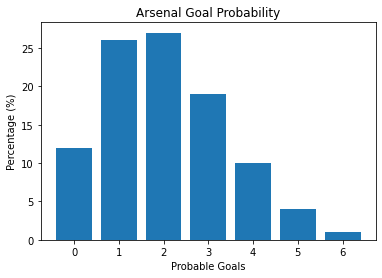

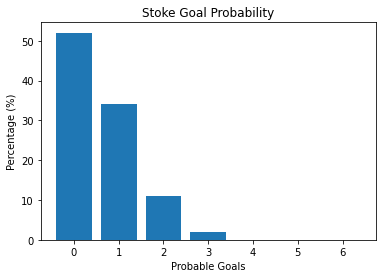

,home,away,probability
0,2,0,14.04
1,1,0,13.52
2,3,0,9.88
3,2,1,9.18
4,1,1,8.84
5,3,1,6.46
6,0,0,6.24
7,4,0,5.20
8,0,1,4.08
9,4,1,3.40


In [2]:
f.average_goals_scored((1.36, 1.06))
f.score_probability('Arsenal', 'Stoke')

This confirms that Arsenal had a 27% chance of scoring 2 goals and Stoke had a 51% chance of scoring no goals. That the most likely score is 2-0 (14% probability) followed by 1-0 and 3-0 (13.52% and 9.88% respectively).  These calculated values match what is in the article.

## Outcome Probability

Now let's see the overall probability of an Arsenal win, a draw or a Stoke win.

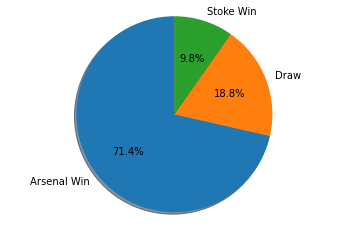

(70.02, 18.43, 9.56)

In [3]:
f.outcome_probability('Arsenal', 'Stoke')

The graph shows an Arsenal win as 71.4%, a draw as 18.8 and a Stoke win as 9.8% (cited in the article as 72%, 18% and 10%).


## Conclusion

Arsenal went on to win the game 4-1 (which by our prediction only had a 3.4% probability), so the probable outcome was correct, but the probable score of 2-0 was not.